In [1]:
import os 
import sys
sys.path.append("/mnt/code")
from cellsystem import CellSystem
from parameters_df import *
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from scipy import special
from cellmodel import CellModel
from scipy.integrate import quad


In [2]:
def rhombusint(x0,x1,xvec,yvec):
    
    # first we sort out whether all values are within bounds
    if x0< xvec[0] or x1 < xvec[0]:
        print("your values are below the lower boundary")
        return("error")
    if x0 > xvec[-1] or x1 > xvec[-1]:
        print("your values are over the upper boundary")
        return("error")
    
    # then we find theboundary values
    mindex=abs(xvec-x0).argmin()
    maxdex=abs(xvec-x1).argmin()
    if xvec[mindex]>x0:
        mindex-=1
    if xvec[maxdex]<x1:
        maxdex+=1
    # we make two sets of indexes to loop over for our lin reg and int
    outerindex=range(mindex,maxdex+1)
    xval=xvec[outerindex]
    xval[0]=x0
    xval[-1]=x1
    
    # we do our lin approx and integral
    intsum=0
    
    for i in range(len(outerindex)-1):
        xs=np.array([xvec[outerindex[i]],xvec[outerindex[i+1]]])
        ys=np.array([yvec[outerindex[i]],yvec[outerindex[i+1]]])*xs**2

        # we dont just want the spacial integral, we want the sphere
        def rhombfunc(x):
            return (((ys[1]-ys[0])/(xs[1]-xs[0])+ys[0])*(x-xs[0]))*4*np.pi
        intsum+=quad(rhombfunc,xval[i],xval[i+1])[0]
    return intsum/(10**15) # make it nmol

In [3]:
# just the diffusion term
xvec=r=(np.arange(start=0,stop= 10.0E+6,step=10.0E+6/600)/1000)
z=np.arange(start=0,stop= 10.0E+6,step=10.0E+6/600).reshape(600,1)

    
def boundedint(z,t,c0,D,lamb):
    u0=z/np.sqrt(2*D*t)
    res=np.ones(len(z))

    for i in range(len(z)):
        def inting(u):
             return(np.sqrt(2/np.pi)*np.exp(-(u**2)/2 -(u**-2)*(1/2)*(z[i]/(np.sqrt(D/lamb)))**2))
        res[i]=quad(inting,u0[i],15)[0]*c0
    return res

Text(0, 0.5, 'Ligand total (nmol)')

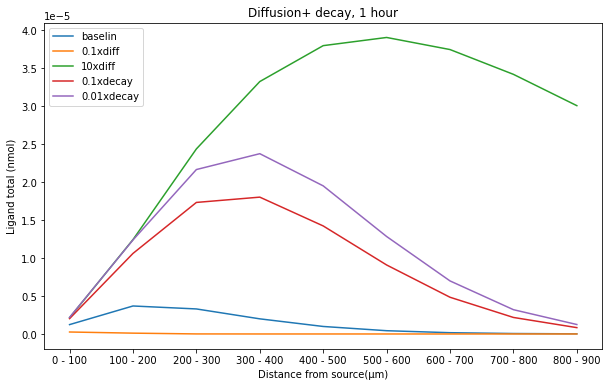

In [4]:
# pure diffusion integral 1h
startxs=np.array([0,100,200,300,400,500,600,700,800])
ys=boundedint(z,3600,100,10*1E6,0.0014440566261665528)
diffresbase=[]
for i in startxs:
    diffresbase.append(rhombusint(i,i+100,xvec,ys))
    
 # diffres lower diff
ys=boundedint(z,3600,100,10*1E5,0.0014440566261665528)
diffreslowdif=[]
for i in startxs:
    diffreslowdif.append(rhombusint(i,i+100,xvec,ys))
    
# diffres higher diff
ys=boundedint(z,3600,100,10*1E7,0.0014440566261665528)
diffreshidif=[]
for i in startxs:
    diffreshidif.append(rhombusint(i,i+100,xvec,ys))
    
# lower decay
ys=boundedint(z,3600,100,10*1E6,0.00014440566261665528)
diffreslowd=[]
for i in startxs:
    diffreslowd.append(rhombusint(i,i+100,xvec,ys)) 
    
# evenlower decay
ys=boundedint(z,3600,100,10*1E6,0.000014440566261665528)
diffreshid=[]
for i in startxs:
    diffreshid.append(rhombusint(i,i+100,xvec,ys))
    
# lower decay higher diff
ys=boundedint(z,3600,100,10*1E7,0.00014440566261665528)
diffreschanged=[]
for i in startxs:
    diffreschanged.append(rhombusint(i,i+100,xvec,ys)) 

# plot
plt.figure(figsize=(10,6))
plt.plot(startxs,diffresbase,startxs,diffreslowdif,startxs,diffreshidif,startxs,diffreslowd,startxs,diffreshid)
plt.legend(["baselin","0.1xdiff","10xdiff","0.1xdecay","0.01xdecay"])
plt.xticks(np.arange(0, 900, step=100), labels=["{z} - {y}".format(z=i,y=i+100) for i in startxs])
plt.title("Diffusion+ decay, 1 hour")
plt.xlabel("Distance from source(μm)")
plt.ylabel("Ligand total (nmol)")
# we can see that technically we can achieve a similar state to the model using only diffusion+ decay
# it should be noted here that this is not achievable with biologically realistic half-lives
# as it would here require a half live at around 10-20 times as high as we initially assume for our ligands

([<matplotlib.axis.XTick at 0x7f3859db03a0>,
 [Text(0, 0, '0 - 100'),
  Text(100, 0, '100 - 200'),
  Text(200, 0, '200 - 300'),
  Text(300, 0, '300 - 400'),
  Text(400, 0, '400 - 500'),
  Text(500, 0, '500 - 600'),
  Text(600, 0, '600 - 700'),
  Text(700, 0, '700 - 800'),
  Text(800, 0, '800 - 900')])

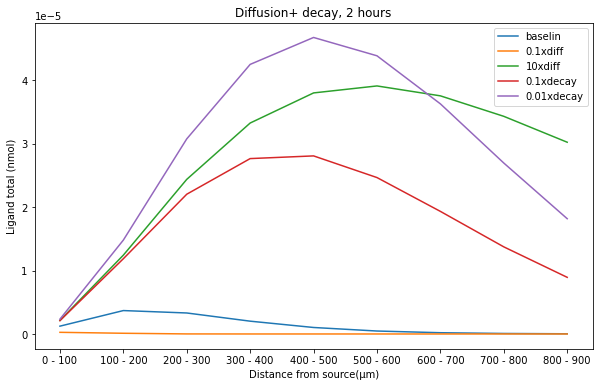

In [5]:
# pure diffusion integral 2h
startxs=np.array([0,100,200,300,400,500,600,700,800])
ys=boundedint(z,7200,100,10*1E6,0.0014440566261665528)
diffresbase=[]
for i in startxs:
    diffresbase.append(rhombusint(i,i+100,xvec,ys))
    
 # diffres lower diff
ys=boundedint(z,7200,100,10*1E5,0.0014440566261665528)
diffreslowdif=[]
for i in startxs:
    diffreslowdif.append(rhombusint(i,i+100,xvec,ys))
    
# diffres higher diff
ys=boundedint(z,7200,100,10*1E7,0.0014440566261665528)
diffreshidif=[]
for i in startxs:
    diffreshidif.append(rhombusint(i,i+100,xvec,ys))
    
# lower decay
ys=boundedint(z,7200,100,10*1E6,0.00014440566261665528)
diffreslowd=[]
for i in startxs:
    diffreslowd.append(rhombusint(i,i+100,xvec,ys)) 
    
# evenlower decay
ys=boundedint(z,7200,100,10*1E6,0.000014440566261665528)
diffreshid=[]
for i in startxs:
    diffreshid.append(rhombusint(i,i+100,xvec,ys))
    
# lower decay higher diff
ys=boundedint(z,7200,100,10*1E7,0.00014440566261665528)
diffreschanged=[]
for i in startxs:
    diffreschanged.append(rhombusint(i,i+100,xvec,ys)) 

# plot
plt.figure(figsize=(10,6))
plt.plot(startxs,diffresbase,startxs,diffreslowdif,startxs,diffreshidif,startxs,diffreslowd,startxs,diffreshid)
plt.legend(["baselin","0.1xdiff","10xdiff","0.1xdecay","0.01xdecay"])
plt.title("Diffusion+ decay, 2 hours")
plt.xlabel("Distance from source(μm)")
plt.ylabel("Ligand total (nmol)")
plt.xticks(np.arange(0, 900, step=100), labels=["{z} - {y}".format(z=i,y=i+100) for i in startxs])

In [6]:
all_parameters=[]

n_scans=24
for i in range(n_scans):
    all_parameters.append(Parameters())
CellSystems=[]
CellSystems.append(CellSystem(all_parameters[0]))
CellSystems[-1].read_file("Results/sensitivityanalysis/baseline.txt")
startxs=np.array([0,100,200,300,400,500,600,700,800])

# time indices =208
doing ti=0
doing ti=100
doing ti=200


In [7]:
CellSystem(all_parameters[0])

In [8]:
onlydif1h=CellSystem(all_parameters[0])
onlydif1h.read_file("Results/onlydiffnodecayinit2.txt")

# time indices =204
doing ti=0
doing ti=100
doing ti=200


In [9]:
# from here its all graphs after the time closest to 3600s

In [10]:
onlydif1h.T[169]

3185.823795511504

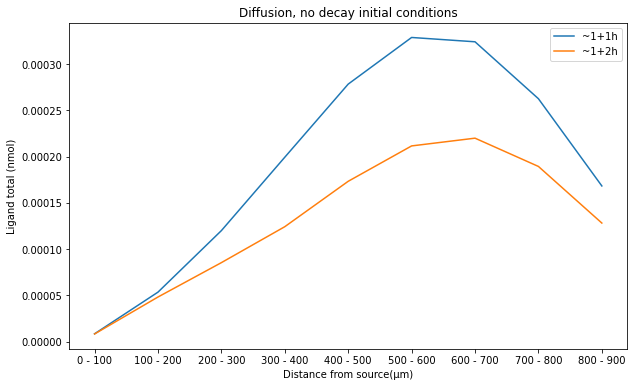

In [11]:
yvec=onlydif1h.Ltot[169,:]

onlydif1hres=[]
for i in startxs:
    onlydif1hres.append(rhombusint(i,i+100,xvec,yvec))
    
yvec=onlydif1h.Ltot[-1,:]
xvec=r=np.arange(start=0,stop= 10.0E+6,step=10.0E+6/600)/1000
onlydif2hres=[]
for i in startxs:
    onlydif2hres.append(rhombusint(i,i+100,xvec,yvec))  
    
    
plt.figure(figsize=(10,6))  
plt.plot(startxs,onlydif1hres,startxs,onlydif2hres)
plt.xticks(np.arange(0, 900, step=100), labels=["{z} - {y}".format(z=i,y=i+100) for i in startxs])
plt.title("Diffusion, no decay initial conditions")
plt.xlabel("Distance from source(μm)")
plt.ylabel("Ligand total (nmol)")
plt.legend(["~1+1h","~1+2h"])

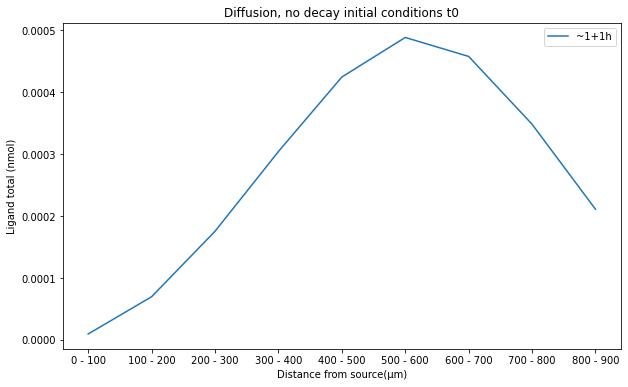

In [12]:
yvec=onlydif1h.Ltot[0,:]
xvec=r=np.arange(start=0,stop= 10.0E+6,step=10.0E+6/600)/1000
onlydif2hres=[]
for i in startxs:
    onlydif2hres.append(rhombusint(i,i+100,xvec,yvec))  
    
    
plt.figure(figsize=(10,6))  
plt.plot(startxs,onlydif2hres)
plt.xticks(np.arange(0, 900, step=100), labels=["{z} - {y}".format(z=i,y=i+100) for i in startxs])
plt.title("Diffusion, no decay initial conditions t0")
plt.xlabel("Distance from source(μm)")
plt.ylabel("Ligand total (nmol)")
plt.legend(["~1+1h","t0"])

In [13]:
softinit1h=CellSystem(all_parameters[0])
softinit1h.read_file("Results/softprof6d.txt")
# we run the int for the soft run, same time as the other one.


# time indices =403
doing ti=0
doing ti=100
doing ti=200
doing ti=300
doing ti=400


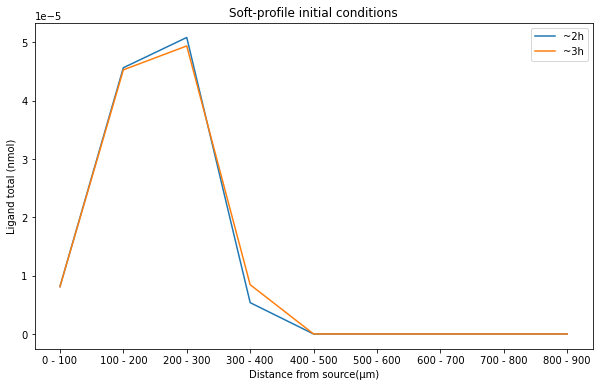

In [14]:

yvec=softinit1h.Ltot[228,:]

softinit1hres=[]
for i in startxs:
    softinit1hres.append(rhombusint(i,i+100,xvec,yvec))
    
yvec=softinit1h.Ltot[246,:]
xvec=r=np.arange(start=0,stop= 10.0E+6,step=10.0E+6/600)/1000
softinit2hres=[]
for i in startxs:
    softinit2hres.append(rhombusint(i,i+100,xvec,yvec))  
    
    
plt.figure(figsize=(10,6))  
plt.plot(startxs,softinit1hres,startxs,softinit2hres)
plt.xticks(np.arange(0, 900, step=100), labels=["{z} - {y}".format(z=i,y=i+100) for i in startxs])
plt.title("Soft-profile initial conditions")
plt.xlabel("Distance from source(μm)")
plt.ylabel("Ligand total (nmol)")
plt.legend(["~2h","~3h"])

Text(0, 0.5, 'Ligand total (nmol)')

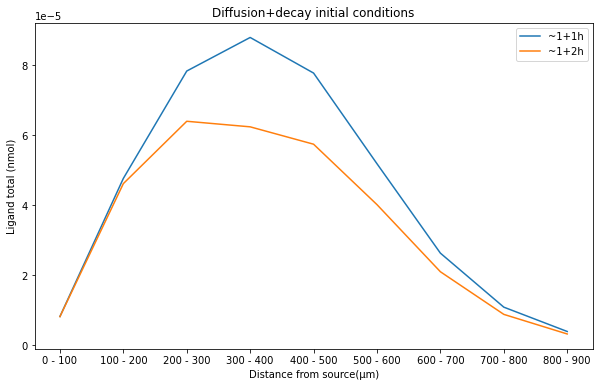

In [15]:
# 1 hour dif + 1 hour
yvec=CellSystems[-1].Ltot[175,:]
xvec=r=np.arange(start=0,stop= 10.0E+6,step=10.0E+6/600)/1000
baselineres=[]
for i in startxs:
    baselineres.append(rhombusint(i,i+100,xvec,yvec))
    
#1 hour dif + 2 hours 

yvec=CellSystems[-1].Ltot[-1,:]
xvec=r=np.arange(start=0,stop= 10.0E+6,step=10.0E+6/600)/1000
baselineres2h=[]
for i in startxs:
    baselineres2h.append(rhombusint(i,i+100,xvec,yvec))  
    
# plot
plt.figure(figsize=(10,6))
plt.plot(startxs,baselineres,startxs,baselineres2h)
plt.xticks(np.arange(0, 900, step=100), labels=["{z} - {y}".format(z=i,y=i+100) for i in startxs])
plt.legend(["~1+1h","~1+2h"])
plt.title("Diffusion+decay initial conditions")
plt.xlabel("Distance from source(μm)")
plt.ylabel("Ligand total (nmol)")

In [16]:
# change hypothesis-> something about how base kinetics doesn't explain or reverse.
# remember to put sources in discussion.
# test biologically 

# time indices =197
doing ti=0
doing ti=100
# time indices =196
doing ti=0
doing ti=100
# time indices =206
doing ti=0
doing ti=100
doing ti=200


Text(0, 0.5, 'Ligand total (nmol)')

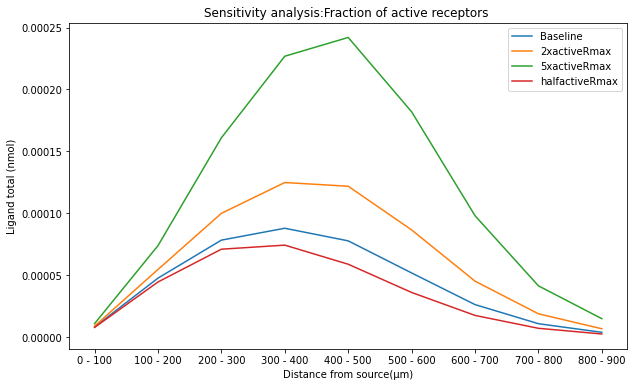

In [17]:
# sensitivity stuff huzzah
# more active receptors

all_parameters[1].set("f_active",0.2)
Rx2=CellSystem(all_parameters[1])
Rx2.read_file("Results/sensitivityanalysis/activeR2x.txt")

yvec=Rx2.Ltot[165,:]

Rx2res=[]
for i in startxs:
    Rx2res.append(rhombusint(i,i+100,xvec,yvec))
    
all_parameters[2].set("f_active",0.5)
Rx5=CellSystem(all_parameters[2])
Rx5.read_file("Results/sensitivityanalysis/activeR5x.txt")

yvec=Rx5.Ltot[165,:]

Rx5res=[]
for i in startxs:
    Rx5res.append(rhombusint(i,i+100,xvec,yvec))


all_parameters[3].set("f_active",0.05)
Rhalf=CellSystem(all_parameters[3])
Rhalf.read_file("Results/sensitivityanalysis/activeRhalved.txt")

yvec=Rhalf.Ltot[165,:]

Rhalfres=[]
for i in startxs:
    Rhalfres.append(rhombusint(i,i+100,xvec,yvec))

    
# plot
plt.figure(figsize=(10,6))
plt.plot(startxs,baselineres,startxs,Rx2res,startxs,Rx5res,startxs,Rhalfres)
plt.title("Sensitivity analysis:Fraction of active receptors ")
plt.xticks(np.arange(0, 900, step=100), labels=["{z} - {y}".format(z=i,y=i+100) for i in startxs])
plt.legend(["Baseline","2xactiveRmax","5xactiveRmax","halfactiveRmax"])
plt.xlabel("Distance from source(μm)")
plt.ylabel("Ligand total (nmol)")


In [ ]:
# all the decays

all_parameters[4].set("decay", 0.00019254)
all_parameters[4].set("initdecay", 0.014440566261665528)

bothdup=CellSystem(all_parameters[4])
bothdup.read_file("Results/sensitivityanalysis/bothdecay10xhigher.txt")

yvec=bothdup.Ltot[-35,:]

bothdupres=[]
for i in startxs:
    bothdupres.append(rhombusint(i,i+100,xvec,yvec))
    
#    
    
all_parameters[5].set("decay", 0.0000019254)
all_parameters[5].set("initdecay", 0.00014440566261665528)
bothddown=CellSystem(all_parameters[5])
bothddown.read_file("Results/sensitivityanalysis/bothdecay10xlower.txt")

yvec=bothddown.Ltot[165,:]

bothddownres=[]
for i in startxs:
    bothddownres.append(rhombusint(i,i+100,xvec,yvec))

#
all_parameters[6].set("decay", 0.00019254)
dup=CellSystem(all_parameters[6])
dup.read_file("Results/sensitivityanalysis/decay10timeshigher.txt")

yvec=dup.Ltot[164,:]

dupres=[]
for i in startxs:
    dupres.append(rhombusint(i,i+100,xvec,yvec))
    
#
all_parameters[7].set("decay", 0.0000019254)
ddown=CellSystem(all_parameters[7])
ddown.read_file("Results/sensitivityanalysis/decay10timeslower.txt")

yvec=ddown.Ltot[167,:]

ddownres=[]
for i in startxs:
    ddownres.append(rhombusint(i,i+100,xvec,yvec))
    
#

all_parameters[8].set("initdecay", 0.014440566261665528)
initdup=CellSystem(all_parameters[8])
initdup.read_file("Results/sensitivityanalysis/initdecay10xhigher.txt")

yvec=initdup.Ltot[203,:]

initdupres=[]
for i in startxs:
    initdupres.append(rhombusint(i,i+100,xvec,yvec))
    
#

all_parameters[9].set("initdecay", 0.00014440566261665528)
initddown=CellSystem(all_parameters[9])
initddown.read_file("Results/sensitivityanalysis/initdecay10xlower.txt")

yvec=initddown.Ltot[169,:]

initddownres=[]
for i in startxs:
    initddownres.append(rhombusint(i,i+100,xvec,yvec))
    
    
# plot
plt.figure(figsize=(10,6))
plt.plot(startxs,bothdupres,startxs,bothddownres,startxs,dupres,startxs,ddownres,startxs,initdupres,startxs,initddownres,startxs,baselineres)
plt.title("Sensitivity analysis:Decay and initial decay ")
plt.xticks(np.arange(0, 900, step=100), labels=["{z} - {y}".format(z=i,y=i+100) for i in startxs])
plt.legend(["Both decay10x","Both decay0.1x","decay10x","decay0.1x","initdecay10x","initdecay0.1x","Baseline"])
plt.xlabel("Distance from source(μm)")
plt.ylabel("Ligand total (nmol)")

# time indices =240
doing ti=0
doing ti=100
doing ti=200
# time indices =204
doing ti=0
doing ti=100
doing ti=200
# time indices =196
doing ti=0
doing ti=100
# time indices =201
doing ti=0
doing ti=100
doing ti=200
# time indices =239
doing ti=0


In [ ]:
# diffusion 

all_parameters[10].set("D", 1000000000)
Dx100=CellSystem(all_parameters[10])
Dx100.read_file("Results/sensitivityanalysis/diff100xhigher.txt")

yvec=Dx100.Ltot[258,:]

Dx100res=[]
for i in startxs:
    Dx100res.append(rhombusint(i,i+100,xvec,yvec))
    
#
all_parameters[11].set("D", 100000)
Dx0_01=CellSystem(all_parameters[11])
Dx0_01.read_file("Results/sensitivityanalysis/diff100xlower.txt")

yvec=Dx0_01.Ltot[45,:]

Dx0_01res=[]
for i in startxs:
    Dx0_01res.append(rhombusint(i,i+100,xvec,yvec))
    
#

all_parameters[12].set("D", 100000000)
Dx10=CellSystem(all_parameters[12])
Dx10.read_file("Results/sensitivityanalysis/diff10xhigher.txt")

yvec=Dx10.Ltot[220,:]

Dx10res=[]
for i in startxs:
    Dx10res.append(rhombusint(i,i+100,xvec,yvec))
    
#
all_parameters[13].set("D", 1000000)
Dx0_1=CellSystem(all_parameters[13])
Dx0_1.read_file("Results/sensitivityanalysis/diff10xlower.txt")

yvec=Dx0_1.Ltot[94,:]

Dx0_1res=[]
for i in startxs:
    Dx0_1res.append(rhombusint(i,i+100,xvec,yvec))
    
    
# plot
plt.figure(figsize=(10,6))
plt.plot(startxs,Dx100res,startxs,Dx10res,startxs,Dx0_01res,startxs,Dx0_1res,startxs,baselineres)
plt.title("Sensitivity analysis:Diffusion ")
plt.xticks(np.arange(0, 900, step=100), labels=["{z} - {y}".format(z=i,y=i+100) for i in startxs])
plt.legend(["Diffusion100x","Diffusion10x","Diffusion0.01x","Diffusion0.1x","Baseline"])
plt.xlabel("Distance from source(μm)")
plt.ylabel("Ligand total (nmol)")

In [ ]:
#clearance

all_parameters[14].set("clearance_rate", 0.000019254088)
cleardown=CellSystem(all_parameters[14])
cleardown.read_file("Results/sensitivityanalysis/clear10xlower.txt")

yvec=cleardown.Ltot[169,:]

cleardownres=[]
for i in startxs:
    cleardownres.append(rhombusint(i,i+100,xvec,yvec))
    
#
all_parameters[15].set("clearance_rate", 0.0019254088)
clearup=CellSystem(all_parameters[15])
clearup.read_file("Results/sensitivityanalysis/clear10xhigher.txt")

yvec=clearup.Ltot[189,:]

clearupres=[]
for i in startxs:
    clearupres.append(rhombusint(i,i+100,xvec,yvec))
    
    
# plot
plt.figure(figsize=(10,6))
plt.plot(startxs,clearupres,startxs,cleardownres,startxs,baselineres)
plt.title("Sensitivity analysis:Clearance rate ")
plt.xticks(np.arange(0, 900, step=100), labels=["{z} - {y}".format(z=i,y=i+100) for i in startxs])
plt.legend(["Clearance10x","Clearance.01x","Baseline"])
plt.xlabel("Distance from source(μm)")
plt.ylabel("Ligand total (nmol)")

In [ ]:
# zero int
all_parameters[15].set("zeroint", 0)
zeroint=CellSystem(all_parameters[15])
zeroint.read_file("Results/nointernalisation.txt")

In [ ]:
yvec=zeroint.Ltot[-1,:]
zerointres=[]
for i in startxs:
    zerointres.append(rhombusint(i,i+100,xvec,yvec))
    
plt.figure(figsize=(10,6))
plt.plot(startxs,zerointres,startxs,baselineres)
plt.title("No receptor internalisation ")
plt.xticks(np.arange(0, 900, step=100), labels=["{z} - {y}".format(z=i,y=i+100) for i in startxs])
plt.xlabel("Distance from source(μm)")
plt.legend(["No internalisation","Baseline"])
plt.ylabel("Ligand total (nmol)")

In [ ]:
# KGRL

all_parameters[16].set("K_GRL", 10)
KGRLx100=CellSystem(all_parameters[16])
KGRLx100.read_file("Results/sensitivityanalysis/KGRL100xhigher.txt")

yvec=KGRLx100.Ltot[170,:]

KGRLx100res=[]
for i in startxs:
    KGRLx100res.append(rhombusint(i,i+100,xvec,yvec))
    
#
all_parameters[17].set("K_GRL", 1)
KGRLx10=CellSystem(all_parameters[17])
KGRLx10.read_file("Results/sensitivityanalysis/KGRL10xhigher.txt")

yvec=KGRLx10.Ltot[168,:]

KGRLx10res=[]
for i in startxs:
    KGRLx10res.append(rhombusint(i,i+100,xvec,yvec))
    
#

all_parameters[18].set("K_GRL", 0.001)
KGRLx01=CellSystem(all_parameters[18])
KGRLx01.read_file("Results/sensitivityanalysis/KGRL10xlower.txt")

yvec=KGRLx01.Ltot[158,:]

KGRLx01res=[]
for i in startxs:
    KGRLx01res.append(rhombusint(i,i+100,xvec,yvec))
    
# whoops

all_parameters[18].set("K_GRL", 0.01)
KGRLx01t=CellSystem(all_parameters[18])
KGRLx01t.read_file("Results/sensitivityanalysis/KGRL10xlowertrue.txt")

yvec=KGRLx01t.Ltot[164,:]

KGRLx01tres=[]
for i in startxs:
    KGRLx01tres.append(rhombusint(i,i+100,xvec,yvec))
    
#
all_parameters[19].set("K_GRL", 0.0001)
KGRLx001=CellSystem(all_parameters[19])
KGRLx001.read_file("Results/sensitivityanalysis/KGRL100xlower.txt")

yvec=KGRLx001.Ltot[166,:]

KGRLx001res=[]
for i in startxs:
    KGRLx001res.append(rhombusint(i,i+100,xvec,yvec))
    
    
# plot
plt.figure(figsize=(10,6))
plt.plot(startxs,KGRLx100res,startxs,KGRLx10res,startxs,KGRLx01tres,startxs,KGRLx01res,startxs,KGRLx001res,startxs,baselineres)
plt.title("Sensitivity analysis:K_GRL ")
plt.xticks(np.arange(0, 900, step=100), labels=["{z} - {y}".format(z=i,y=i+100) for i in startxs])
plt.legend(["K_GRL100x","KGRL10x","K_GRL0.1x","K_GRL0.01x","K_GRL0.001x","Baseline"])
plt.xlabel("Distance from source(μm)")
plt.ylabel("Ligand total (nmol)")

In [ ]:
# K_RL
all_parameters[20].set("K_GRL", 1000)
KRLx100=CellSystem(all_parameters[20])
KRLx100.read_file("Results/sensitivityanalysis/KRL100xhigher.txt")

yvec=KRLx100.Ltot[187,:]

KRLx100res=[]
for i in startxs:
    KRLx100res.append(rhombusint(i,i+100,xvec,yvec))
    
#
all_parameters[21].set("K_RL", 100)
KRLx10=CellSystem(all_parameters[17])
KRLx10.read_file("Results/sensitivityanalysis/KRL10xhigher.txt")

yvec=KRLx10.Ltot[173,:]

KRLx10res=[]
for i in startxs:
    KRLx10res.append(rhombusint(i,i+100,xvec,yvec))
    
#

all_parameters[22].set("K_GRL", 1)
KRLx01=CellSystem(all_parameters[22])
KRLx01.read_file("Results/sensitivityanalysis/KRL10xlower.txt")

yvec=KRLx01.Ltot[179,:]

KRLx01res=[]
for i in startxs:
    KRLx01res.append(rhombusint(i,i+100,xvec,yvec))
    
#
all_parameters[23].set("K_GRL", 0.1)
KRLx001=CellSystem(all_parameters[23])
KRLx001.read_file("Results/sensitivityanalysis/KRL100xlower.txt")

yvec=KRLx001.Ltot[181,:]

KRLx001res=[]
for i in startxs:
    KRLx001res.append(rhombusint(i,i+100,xvec,yvec))
    
    
# plot
plt.figure(figsize=(10,6))
plt.plot(startxs,KRLx100res,startxs,KRLx10res,startxs,KRLx01res,startxs,KRLx001res,startxs,baselineres)
plt.title("Sensitivity analysis:K_RL ")
plt.xticks(np.arange(0, 900, step=100), labels=["{z} - {y}".format(z=i,y=i+100) for i in startxs])
plt.legend(["K_RL100x","KRL10x","K_RL0.1x","K_RL0.01x","Baseline"])
plt.xlabel("Distance from source(μm)")
plt.ylabel("Ligand total (nmol)")

In [ ]:
# duplicating Grethes graphs
# median eminence
me1=[0.02,0.05,0.085,0.1,0.08,0.05,0.03,0.02,0.01]
me2=[0.02,0.0499,0.07,0.065,0.04,0.02,0.01,0.01,0.01]
me3=[0.02,0.0499,0.069,0.05,0.03,0.02,0.018,0.016,0.01]
me4=[0.02,0.0498,0.055,0.03,0.015,0.014,0.013,0.012,0.01]
plt.figure(figsize=(10,6))
plt.plot(startxs,me1,startxs,me2,startxs,me3,startxs,me4)
plt.title("Data:Median Eminence ")
plt.xticks(np.arange(0, 900, step=100), labels=["{z} - {y}".format(z=i,y=i+100) for i in startxs])
plt.legend(["Marked exendin analog 1","Marked exendin analog 2","Marked exendin analog 3","Marked exendin analog 4"])
plt.xlabel("Distance from source(μm)")
plt.ylabel("Approximate coverage(mm^3)")


In [ ]:
ap1=[0.035,0.05,0.07,0.065,0.027,0.01,0.01,0.01,0.012]
ap2=[0.035,0.05,0.049,0.02,0.01,0.01,0.0102,0.011,0.013]
ap3=[0.035,0.045,0.048,0.019,0.009,0.008,0.007,0.006,0.005]
ap4=[0.02,0.024,0.025,0.015,0.005,0.005,0.005,0.005,0.005]
plt.figure(figsize=(10,6))
plt.plot(startxs,ap1,startxs,ap2,startxs,ap3,startxs,ap4)
plt.title("Data:Area Postrema ")
plt.xticks(np.arange(0, 900, step=100), labels=["{z} - {y}".format(z=i,y=i+100) for i in startxs])
plt.legend(["Marked exendin analog 1","Marked exendin analog 2","Marked exendin analog 3","Marked exendin analog 4"])
plt.xlabel("Distance from source(μm)")
plt.ylabel("Approximate coverage(mm^3)")

In [ ]:
ov1=[0.005,0.02,0.078,0.13,0.12,0.058,0.04,0.022,0.02]
ov2=[0.005,0.019,0.05,0.054,0.04,0.03,0.02,0.01,0.005]
ov3=[0.005,0.019,0.04,0.035,0.03,0.031,0.04,0.042,0.042]
ov4=[0.005,0.019,0.038,0.032,0.029,0.029,0.032,0.03,0.03]
plt.figure(figsize=(10,6))
plt.plot(startxs,ov1,startxs,ov2,startxs,ov3,startxs,ov4)
plt.title("Data:Vascular Organ of the Lamina Terminalis")
plt.xticks(np.arange(0, 900, step=100), labels=["{z} - {y}".format(z=i,y=i+100) for i in startxs])
plt.legend(["Marked exendin analog 1","Marked exendin analog 2","Marked exendin analog 3","Marked exendin analog 4"])
plt.xlabel("Distance from source(μm)")
plt.ylabel("Approximate coverage(mm^3)")

In [ ]:
sf1=[0.03,0.049,0.09,0.15,0.2,0.195,0.15,0.135,0.13]
sf2=[0.03,0.049,0.075,0.1,0.13,0.13,0.135,0.14,0.135]
sf3=[0.03,0.049,0.072,0.09,0.07,0.05,0.05,0.051,0.05]
sf4=[0.03,0.035,0.065,0.09,0.12,0.09,0.049,0.04,0.038]
plt.figure(figsize=(10,6))
plt.plot(startxs,sf1,startxs,sf2,startxs,sf3,startxs,sf4)
plt.title("Data:Subfornical organ")
plt.xticks(np.arange(0, 900, step=100), labels=["{z} - {y}".format(z=i,y=i+100) for i in startxs])
plt.legend(["Marked exendin analog 1","Marked exendin analog 2","Marked exendin analog 3","Marked exendin analog 4"])
plt.xlabel("Distance from source(μm)")
plt.ylabel("Approximate coverage(mm^3)")